In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from __future__ import absolute_import

In [2]:
from extract_data import *
from finbeat_calc import *
from plot_track import *
from plot_accel import *
from check_plots import *
from plot_analysis import *
from make_subset import *
from read_data import *
#from fourier_analysis import *
import pywt
import pylab
import numpy as np

plt.style.use('mystyle.mplstyle')

tracklist, finbeats, finbeat_byP, finbeat_byT = read_data('data.pickle')

In [3]:
bass_subset = make_subset(group_by1='species', identifier1='Bass', tracklist=tracklist)
bass_burst_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
bass_steady_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
bass_linacc_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')
trout_subset = make_subset(group_by1 = 'species', identifier1 ='BTrout', tracklist=tracklist)
trout_burst_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
trout_steady_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
trout_linacc_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')

In [ ]:
plot_analysis("Trout_byP_FrqAmpVel",trout_subset,finbeat_byP,tracklist,cutoff=False, lines=True, zaxis = 'V', save=False)

In [162]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import peakutils

matplotlib.rc('axes.formatter', useoffset=False)


def fourier_analysis(tracklist_subset, tracklist):
    """Computes full width at half maximum from FFT of tailbeat movement

        Args:
            tracklist_subset (list): a list of strings with the trial
                                names of the desired trials from tracklist.
                                 Note: The list (even of a single
                                 element) must be contained in square
                                 brackets.
                                 Also note: Alternatively, to iterate
                                 over all trials, set this to
                                 tracklist.keys()
            tracklist (dict): a tracklist produced by extract_data()
        Returns:


"""
    fourier_outputs ={}
    test = [0]*len(tracklist_subset)
    count = 0
    for trial in tracklist_subset:  # Iterate over desired trials
        trial_name = tracklist[trial]['sequence']
        # print(trial_name)  # for diagnostics
        fish = tracklist[trial]['fish']
        tailtip = tracklist[trial]['data']['pt2y_smth']
        time = tracklist[trial]['data'].index.values
        base = peakutils.baseline(tailtip, 1)  # Find linear bkgrd trend
        framerate = tracklist[trial]['FPS']
        behavior = tracklist[trial]['behavior']
        trial_name_col =[0]*25
        behavior_col = [0]*25

        # Do the FFT using Scipy
        tailbeat_freqs = np.fft.fft(tailtip - base)
        frequency_domain = np.fft.fftfreq(len(time), 1 / framerate)
                     
        fig = plt.figure()
        plt.suptitle(trial + behavior)
        plt.plot(np.abs(frequency_domain),
                 np.abs(tailbeat_freqs))
        plt.xlim(0,12)
        
        plt.show()
      


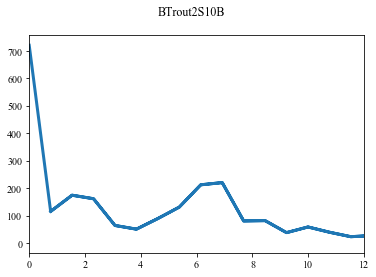

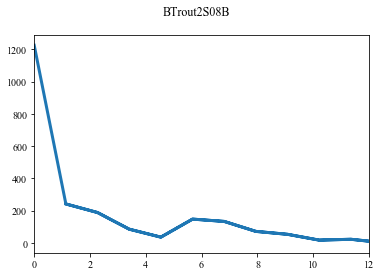

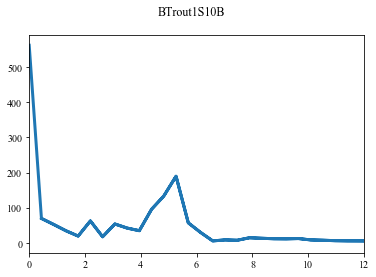

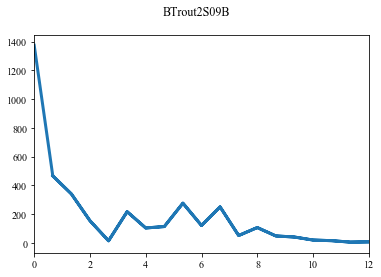

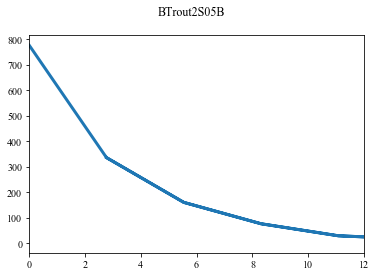

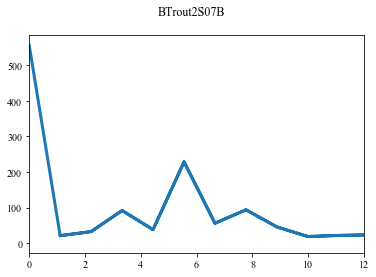

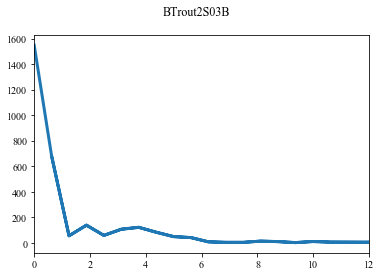

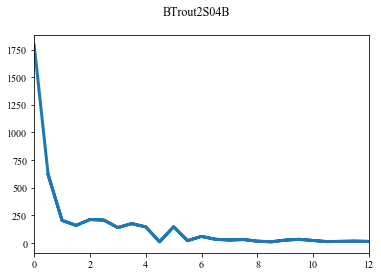

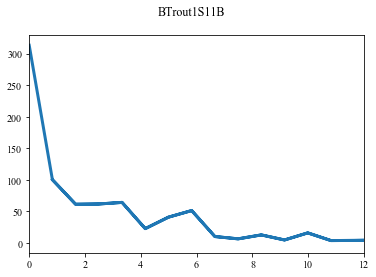

In [170]:
print()
trout_FFTS = fourier_analysis(trout_burst_subset, tracklist)

In [154]:
trout_FFTS=np.array(trout_FFTS)

In [155]:
from scipy.spatial import distance


In [156]:
trout_FFTs_L2 = distance.cdist(trout_FFTS,trout_FFTS,'euclidean')

C:\Anaconda3\lib\site-packages\scipy\spatial\distance.py:143: ComplexWarning: Casting complex values to real discards the imaginary part
  X = X.astype(np.double)


ValueError: XA must be a 2-dimensional array.

In [ ]:
tracklist_subset = ['Bass1S12', 'Bass1S09', 'Bass1S06']


for trial in tracklist_subset:
    data = tracklist[trial]['data']['pt2y_smth']
    length = data.size
    FR = tracklist[trial]['FPS']
    sampling = 1.0/FR
    x = pylab.arange(0, 1, 1. / length)

    cA = []
    cD = []

    (cA, cD) = pywt.dwt(data,'sym20')

    pylab.title(trial)
    pylab.imshow((cA,cD), extent=[-1, 1, 1, 31], cmap='bone', aspect='auto') 
    pylab.show()


